# Data exploration

In [1]:
import pandas as pd
from src.data import clean_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Before we start, we can use the data cleaning steps from our previous notebook to clean up and prepare the data for analysis.

In [2]:
df_no_types = pd.read_csv("../../data/interim/loan_sampled_50000-cleaned.csv", low_memory = False)
df = df_no_types

In [3]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,has_recent_bc_dlq,has_major_derog,has_recent_revol_delinq,has_recent_delinq,is_payment_plan,is_whole_loan,is_individual_app,is_36_month_term,term_months,is_cash
0,6200,10.41,201.26,B,B3,1.0,RENT,62000.0,Not Verified,2018-03-01,...,False,False,False,False,False,True,True,False,36,True
1,19600,25.69,583.25,F,F1,9.0,MORTGAGE,110000.0,Source Verified,2016-10-01,...,False,False,False,False,False,False,True,False,60,True
2,16000,11.99,355.84,C,C1,1.0,MORTGAGE,60000.0,Not Verified,2015-12-01,...,False,False,True,True,False,True,True,False,60,True
3,16400,15.77,574.72,D,D1,3.0,MORTGAGE,41000.0,Not Verified,2015-12-01,...,True,True,True,True,False,True,True,False,36,True
4,7100,14.49,244.36,C,C4,2.0,RENT,24000.0,Source Verified,2014-10-01,...,False,False,False,False,False,False,True,False,36,True


## Outlier removal
 
Let's go through the dataset and remove rows that contain unreasonable values. We can either delete these rows or fill the values with something more reasonable. We'll go through all the columns with numeric values but, for brevity, only show in this notebook what we do with the columns that have outliers. Removing outliers will allow us to do data normalisation later. 

We list below the columns that contain outlier values (as seen by visual inspection of their distribution's histogram) and show an example of a histogram.

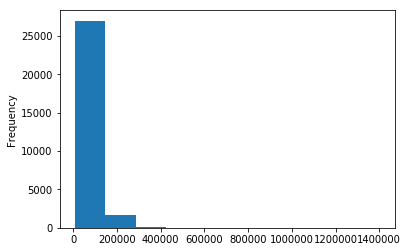

In [4]:
to_explore = ["annual_inc", "revol_bal", "tot_cur_bal", "total_bal_il", "max_bal_bc",
             "total_rev_hi_lim", "avg_cur_bal", "bc_open_to_buy", "delinq_amnt", "tot_hi_cred_lim",
             "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]
df[to_explore[0]].plot(kind = "hist")

Let's get the quantiles of each column. Based on the results, I'd say it's reasonable here to remove rows where the column value exceeds the 0.99 quantile. Dropping from the 0.9 quantile resulted in dropping over 3/4 of the rows! 

In [5]:
df[to_explore].describe()

,annual_inc,revol_bal,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,delinq_amnt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.881700e+04,28817.000000,2.881700e+04,28817.000000,28817.000000,28817.000000,28817.000000,28817.000000,28817.000000,2.881700e+04,28817.000000,28817.000000,28817.000000
mean,7.570673e+04,16073.338862,1.318562e+05,13569.075233,2070.753930,30516.238401,12617.383524,9507.875247,8.227019,1.626677e+05,47394.424888,20609.355346,39565.176007
std,5.032113e+04,20925.598239,1.523410e+05,31361.124135,4100.661697,31867.608159,15534.586722,14707.974549,539.454439,1.703644e+05,46656.053395,21191.816510,42317.115299
min,7.200000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.600000e+04,5926.000000,2.478500e+04,0.000000,0.000000,12500.000000,2686.000000,1140.000000,0.000000,4.288000e+04,18910.000000,6900.000000,11520.000000
50%,6.500000e+04,11082.000000,6.808100e+04,0.000000,0.000000,22400.000000,6520.000000,4155.000000,0.000000,9.882900e+04,35595.000000,14200.000000,29403.000000
75%,9.000000e+04,19455.000000,1.989060e+05,14733.000000,2819.000000,38800.000000,17701.000000,11520.000000,0.000000,2.395860e+05,60379.000000,27000.000000,54076.000000
max,1.400000e+06,606088.000000,3.652389e+06,585583.000000,60987.000000,793232.000000,255525.000000,217362.000000,65000.000000,3.754640e+06,868585.000000,307300.000000,800000.000000


In [6]:
df[to_explore].quantile([0.5, 0.75, 0.99])

,annual_inc,revol_bal,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,delinq_amnt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0.50,65000.0,11082.00,68081.00,0.0,0.00,22400.0,6520.00,4155.00,0.0,98829.00,35595.0,14200.00,29403.00
0.75,90000.0,19455.00,198906.00,14733.0,2819.00,38800.0,17701.00,11520.00,0.0,239586.00,60379.0,27000.00,54076.00
0.99,250000.0,92830.64,656360.16,146526.4,19093.48,149320.0,70574.32,72056.56,0.0,740254.16,230833.4,101574.08,200069.92


In [7]:
for col in to_explore:
    df = df[df[col] <= df[col].quantile(0.99)]

In [8]:
df.shape

(25471, 87)

## Visualisation

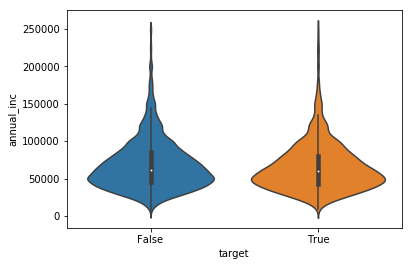

In [24]:
sns.violinplot(x = "target", y = "annual_inc", data = df)

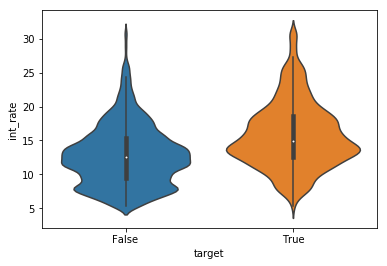

In [26]:
sns.violinplot(x = "target", y = "int_rate", data = df)

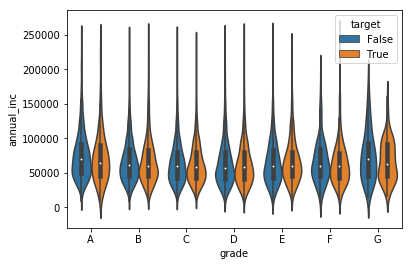

In [29]:
sns.violinplot(x = "grade", y = "annual_inc", hue = "target", data = df, order = ["A", "B", "C", "D", "E", "F", "G"])

## Correlation 

To get an idea of what sort of features might be useful in prediction, let's take a look at the correlation between the dataframe's numeric columns and the target variable. For ease of sorting we'll take the absolute value: values with higher values indicate a higher (positive or negative) correlation.

In [9]:
abs(df._get_numeric_data().corrwith(df["target"])).sort_values(ascending = False).head(20)

target                  1.000000
int_rate                0.257432
term_months             0.190189
all_util                0.109768
acc_open_past_24mths    0.103747
dti                     0.103631
loan_amnt               0.102368
open_rv_24m             0.090186
il_util                 0.089370
num_tl_op_past_12m      0.085427
installment             0.084607
num_actv_rev_tl         0.082473
num_rev_tl_bal_gt_0     0.079428
bc_open_to_buy          0.078770
percent_bc_gt_75        0.073799
open_il_24m             0.073121
open_acc_6m             0.069391
inq_last_12m            0.069317
open_rv_12m             0.068838
total_bal_il            0.065720
dtype: float64

We can see here that there is little correlation between the other numerical columns and our target variable.

We have a few more things we can try, though:

- Feature engineering based on the correlated variables. We could combine multiple variables (two variables alone may not have a high correlation with the target, but some combination of them may!). 

- Getting information out of the categorical variables. The method above will only do correlation on numeric columns: there may be some information hiding in our categorical columns that we can use as features, so let's explore that. 

## Categorical values: proportion defaulted by category

Our categorical columns are as follows: grade, sub_grade, home_ownership, verification_status, purpose, addr_state. Let's look at the proportion of default loans per category, to see if we can use this to create features. 

In [10]:
def prop_by_catg(col, df):
    prop_df = df.groupby(col)["target"].value_counts().unstack().reset_index()
    prop_df.columns = [col, "Non-default", "Default"]
    prop_df["% default"] = prop_df["Default"] / (prop_df["Default"] + prop_df["Non-default"])
    return prop_df

def plot_by_catg(col, df):
    catg_df = prop_by_catg(col, df)
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.title(col)
    catg_df.set_index(col)["% default"].plot(kind = "bar")
    

In [11]:
catg_columns = ["grade", "sub_grade", "home_ownership", "verification_status", "purpose", "addr_state"]

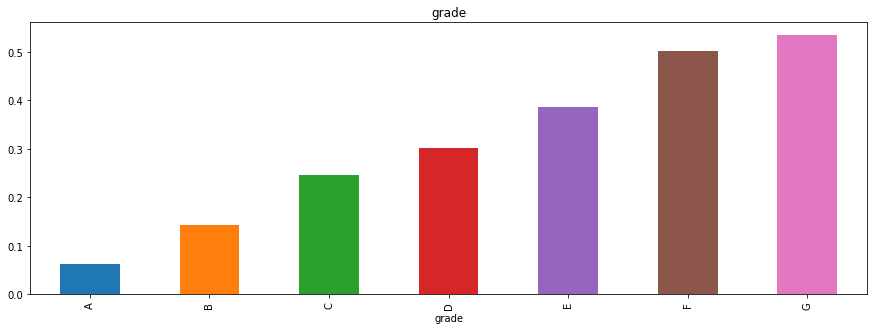

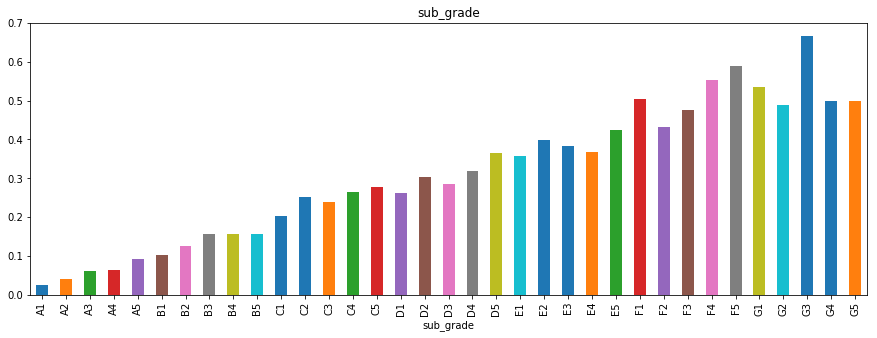

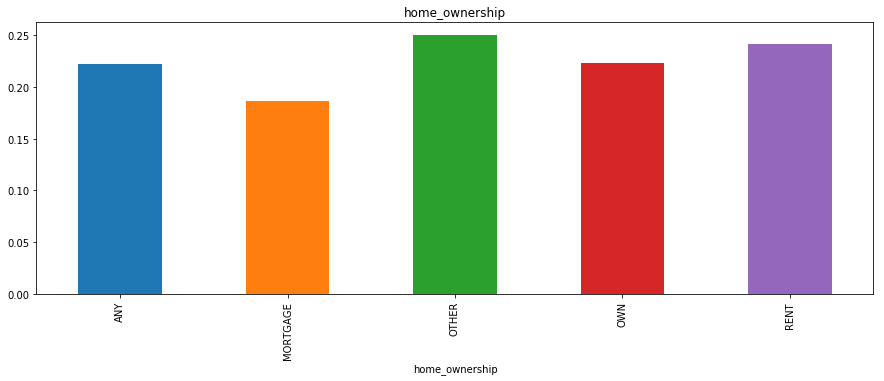

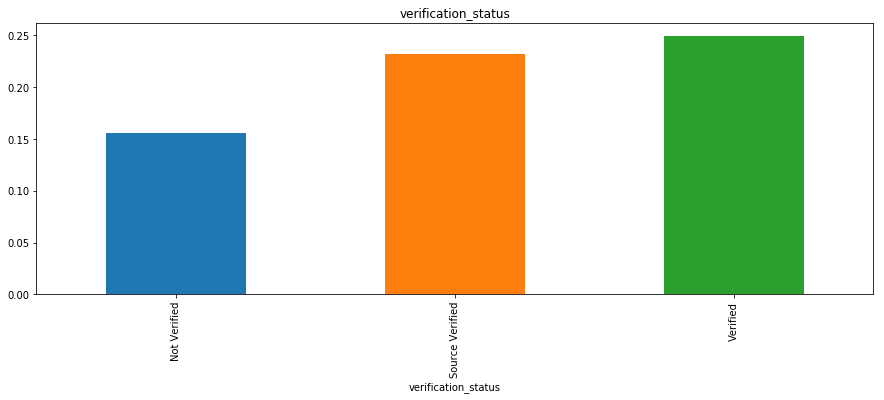

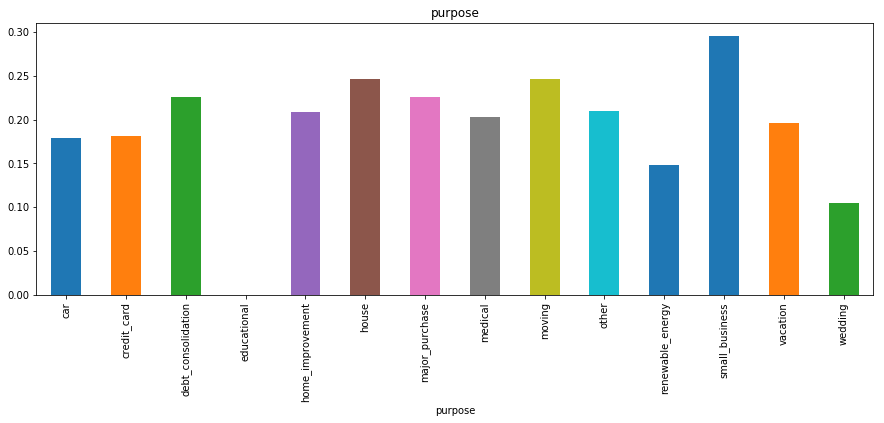

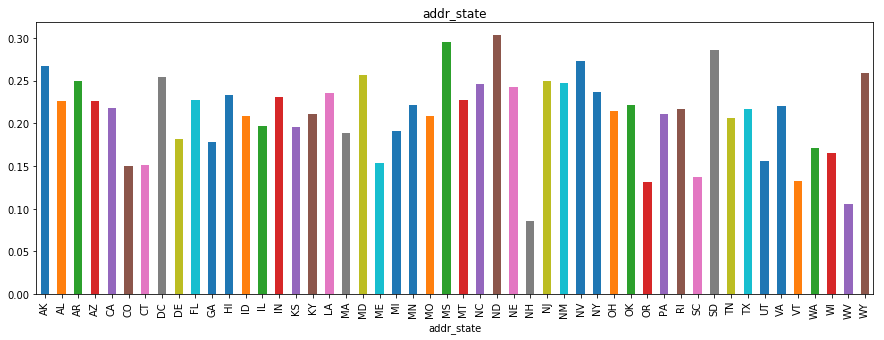

In [12]:
for col in catg_columns:
    plot_by_catg(col, df)

The key insight from this is that grade (ie. the credit rating) has significant differences in default rates: from <10% for a to >50% for G. Sub-grade exhibits similar behavior, but at a much too granular level. To account for this, let's add three new columns: is_grade_a, is_grade_a_or_b, is_grade_f_or_g. 

We'll also change verification_status to a boolean flag: is_verified. source_verified and verified have similar default rates, so we'll condense them to one. 

In [13]:
df["is_grade_a"] = df["grade"].isin(["A"])
df["is_grade_a_or_b"] = df["grade"].isin(["A", "B"])
df["is_grade_f_or_g"] = df["grade"].isin(["F", "G"])
df["is_verified"] = df["verification_status"] != "Not Verified"

In [14]:
df[["is_grade_a", "is_grade_a_or_b", "is_grade_f_or_g", "is_verified"]].corrwith(df["target"])

is_grade_a        -0.160477
is_grade_a_or_b   -0.218957
is_grade_f_or_g    0.131172
is_verified        0.094627
dtype: float64

## More feature engineering

Based on the business context, let's add a few more columns that may be useful. 

loan:income_ratio    0.143884
dtype: float64


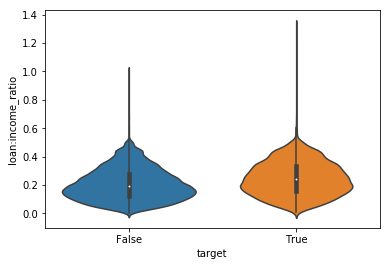

In [15]:
df["loan:income_ratio"] = df["loan_amnt"] / df["annual_inc"]
print(df[["loan:income_ratio"]].corrwith(df["target"]))
sns.violinplot(x = "target", y = "loan:income_ratio", data = df)

## PCA plotting

Just out of curiosity, let's plot a PCA decomposition of our data (excl. numerical, categorical columns) and see if there is a visible difference in classes.

We'll start by removing non_numerical columns and normalizing the remaining column values. 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
pca_df = df.drop(columns = df.select_dtypes(include='object').columns)

In [18]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(pca_df.values), 
                       columns=pca_df.columns, index=pca_df.index)

/home/mikey/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
norm_df.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,is_whole_loan,is_individual_app,is_36_month_term,term_months,is_cash,is_grade_a,is_grade_a_or_b,is_grade_f_or_g,is_verified,loan:income_ratio
0,0.139949,0.198598,0.104330,0.090909,0.225700,0.104873,0.0000,0.035714,0.142857,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.073021
1,0.480916,0.793614,0.330419,0.818182,0.423394,0.300983,0.0000,0.107143,0.214286,0.021739,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.132489
2,0.389313,0.260125,0.195821,0.090909,0.217463,0.413876,0.0625,0.000000,0.250000,0.000000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.199793
3,0.399491,0.407321,0.325371,0.272727,0.139209,0.090435,0.0000,0.107143,0.071429,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.301211
4,0.162850,0.357477,0.129839,0.181818,0.069193,0.508322,0.0000,0.071429,0.142857,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.221978


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(norm_df.drop(columns = ["target"]))
pc_df = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])

In [21]:
pc_df = pd.concat([pc_df.reset_index(drop = True), df[["target"]].reset_index(drop = True)], axis = 1)

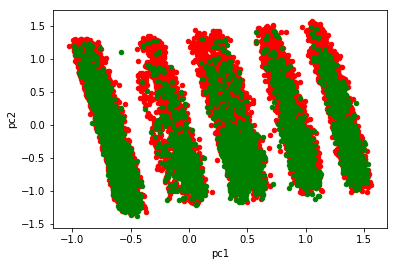

In [22]:
ax = pc_df[~pc_df["target"]].plot(kind = "scatter", x = "pc1", y = "pc2", color = 'Red')
ax = pc_df[pc_df["target"]].plot(kind = "scatter", x = "pc1", y = "pc2", ax = ax, color='Green')

That is, admittedly, a strange pattern. It might be worth investigating further what is causing these patterns in the PCA. For now, what we can get from this is that there isn't a clear difference in the two classes, which may cause problems later with prediction.

From looking at the explained variance for components, we see that our first two components account for little of the explained variance - so our projection to n = 2 loses a lot of information.

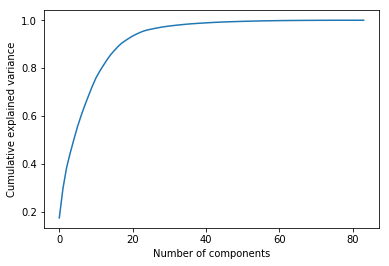

In [23]:
pca = PCA().fit(norm_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');